### Histogram Equalisation and stretching.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
train = pd.read_csv('images/mnist_train.csv')

print(train.shape)

(60000, 785)


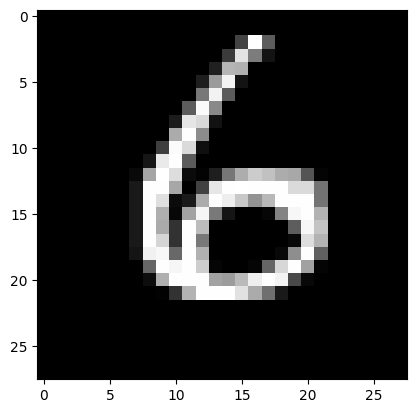

In [3]:
row_num = np.random.randint(train.shape[0])

pixels = train.iloc[row_num][1:].values.reshape(28, 28)
image = np.array(pixels, dtype=np.uint8)
image = Image.fromarray(image)

plt.imshow(image, cmap='gray')
plt.show()

In [9]:
import numpy as np

def histogram_equalization(image):
    image = np.array(image)
    # Step 1: Compute the input histogram
    input_histogram = np.zeros(256, dtype=int)
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            pixel_val = image[row][col]
            input_histogram[pixel_val] += 1

    # Step 2: Compute the pixel frequency and PDF
    pixel_frequency = input_histogram.copy()
    pixel_pdf = pixel_frequency / np.sum(pixel_frequency)

    # Step 3: Compute the cumulative distribution function (CDF)
    pixel_cumsum = np.cumsum(pixel_pdf)
    L = 256  # Number of intensity levels

    # Step 4: Create the pixel mapping
    pixel_map = np.fix((L - 1) * pixel_cumsum).astype(int)

    # Step 5: Create the output image
    output_image = np.zeros_like(image)
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            pixel_val = image[row][col]
            output_image[row][col] = pixel_map[pixel_val]

    return output_image

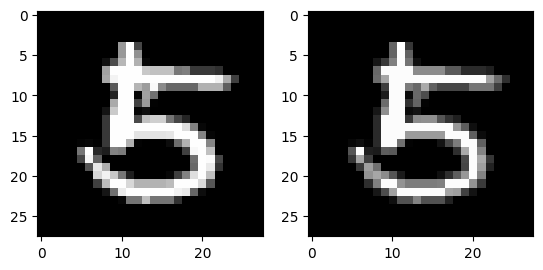

In [11]:
result = histogram_equalization(image)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.show()

In [13]:
def histogram_stretching(image, min_stretch=0, max_stretch=255):
    image = np.array(image)
    image_min = np.min(image)
    image_max = np.max(image)

    stretched_image = np.round((image - image_min) / (image_max - image_min)) * 255
    return stretched_image

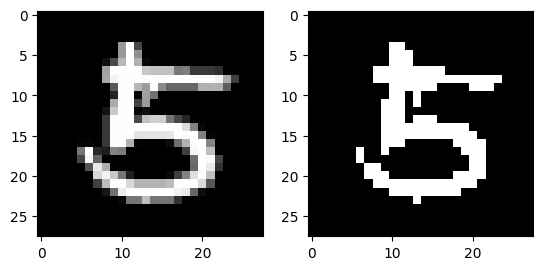

In [14]:
stretched_image = histogram_stretching(image)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray')
plt.show()